In [57]:
!pip install ucimlrepo


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\hanna\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [59]:
# To investigate how Admission Grade affects the likelihood of being a Scholarship Holder 

import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from ucimlrepo import fetch_ucirepo

# Load dataset
dataset = fetch_ucirepo(id=697)
df = dataset.data.original
df.columns = df.columns.str.strip()  # To clean column names by removing leading and trailing whitespace

# Filter relevant columns 
df_filtered = df[['Scholarship holder', 'Admission grade']]

# Add constant for statsmodels
X = sm.add_constant(df_filtered['Admission grade'])  # Add a column of constant to Admission Grade so that the model can learn an intercept
y = df_filtered['Scholarship holder']

# Set up a logistic regression model:
model = sm.Logit(y, X)
result = model.fit() #Train the model to find the best coefficients that explain the relationship between admission grade and scholarship status

# Display regression summary
print("To investigate how Admission Grade affects the likelihood of being a Scholarship Holder\n")
print(result.summary())

#p-value of 0.209 indicates that the relationship between Admission Grade and Scholarship Holder is not statistically significant at the 0.05 level.
# This suggests that Admission Grade does not have a strong influence on whether a student is a Scholarship Holder in this dataset. 

Optimization terminated successfully.
         Current function value: 0.560413
         Iterations 5
To investigate how Admission Grade affects the likelihood of being a Scholarship Holder

                           Logit Regression Results                           
Dep. Variable:     Scholarship holder   No. Observations:                 4424
Model:                          Logit   Df Residuals:                     4422
Method:                           MLE   Df Model:                            1
Date:                Sun, 27 Jul 2025   Pseudo R-squ.:               0.0003168
Time:                        00:20:08   Log-Likelihood:                -2479.3
converged:                       True   LL-Null:                       -2480.1
Covariance Type:            nonrobust   LLR p-value:                    0.2100
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const    

In [62]:
# To investigate how Scholarship Holder affects the likelihood of being a Debtor

# Filter relevant columns and drop missing values
df_filtered = df[['Scholarship holder', 'Debtor']]

# Add constant for statsmodels
X = sm.add_constant(df_filtered['Scholarship holder'])  # Add intercept
y = df_filtered['Debtor']

# Run logistic regression
model = sm.Logit(y, X)
result = model.fit()

# Display regression summary
print(result.summary())

# p-value of 0.000 indicates that the relationship between Scholarship Holder and Debtor is statistically significant at the 0.05 level.
# This suggests that being a Scholarship Holder has a strong influence on whether a student is a Debtor in this dataset.
# A negative coefficient for Scholarship Holder indicates that being a Scholarship Holder is associated with a lower likelihood of being a Debtor.
# This means that students who are Scholarship Holders are less likely to have unpaid tuition fees compared to those who are not Scholarship Holders.   

Optimization terminated successfully.
         Current function value: 0.351720
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Debtor   No. Observations:                 4424
Model:                          Logit   Df Residuals:                     4422
Method:                           MLE   Df Model:                            1
Date:                Sun, 27 Jul 2025   Pseudo R-squ.:                0.006939
Time:                        00:21:51   Log-Likelihood:                -1556.0
converged:                       True   LL-Null:                       -1566.9
Covariance Type:            nonrobust   LLR p-value:                 3.114e-06
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.9367      0.052    -37.061      0.000      -2.039      -1.834
Schol

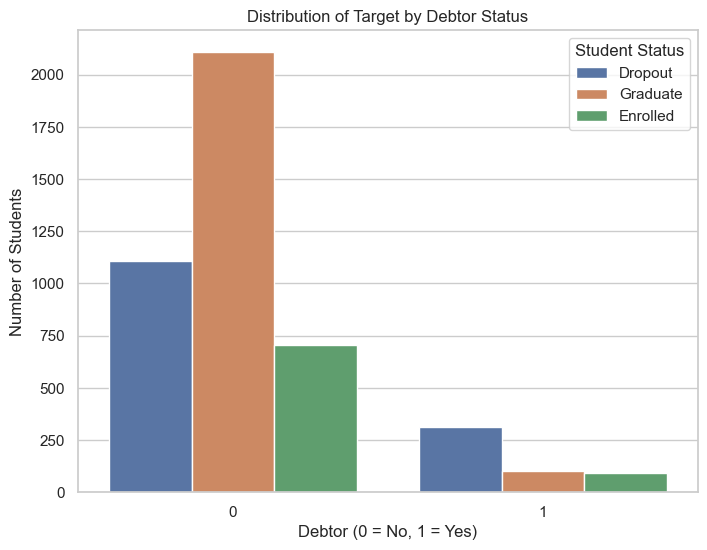

Percentage of each outcome by Debtor status:
Target  Dropout  Enrolled  Graduate
Debtor                             
0         28.28     17.95     53.76
1         62.03     17.89     20.08


In [64]:
## To visualize the distribution of the target variable by debtor status

import matplotlib.pyplot as plt

# Drop rows with missing values
df_filtered = df.dropna(subset=['Debtor', 'Target'])

# Count plot: How target variable is distributed within Debtor = 0 vs. Debtor = 1
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df_filtered, x='Debtor', hue='Target') #Grouped bar plot that shows the count of observations for each category in 'Debtor' separated by the Target columns
plt.title("Distribution of Target by Debtor Status")
plt.xlabel("Debtor (0 = No, 1 = Yes)")
plt.ylabel("Number of Students")
plt.legend(title="Student Status")
plt.show()

# Calculate proportions
cross_tab = pd.crosstab(df_filtered['Debtor'], df_filtered['Target'], normalize='index') * 100 # Normalize by index to get percentage of each outcome by Debtor status
print("Percentage of each outcome by Debtor status:")
print(cross_tab.round(2))


In [65]:
# To calculate the dropout rate in the dataset

# Drop rows with missing 'Target'
df = df.dropna(subset=['Target'])

# Total number of students
total_students = df.shape[0]

# Number of dropouts
num_dropouts = (df['Target'] == 'Dropout').sum()

# Percentage calculation
dropout_percentage = (num_dropouts / total_students) * 100

print(f"Total students: {total_students}")
print(f"Number of dropouts: {num_dropouts}")
print(f"Dropout rate: {dropout_percentage:.2f}%")

Total students: 4424
Number of dropouts: 1421
Dropout rate: 32.12%


In [66]:
# To find the percentage of dropout students with unpaid tuition fees

# Count those with tuition fees not up to date (i.e. 'Tuition fees up to date'= 0)
not_paid_count = (dropout_df['Tuition fees up to date'] == 0).sum()

# Calculate percentage
percentage = (not_paid_count / num_dropouts) * 100

print(f"Percentage of dropout students with unpaid tuition: {percentage:.2f}%")

Percentage of dropout students with unpaid tuition: 32.16%


In [67]:
# To find the percentage of graduates with unpaid tuition fees

graduate_df = df[df['Target'] == 'Graduate']
num_graduate = (df['Target'] == 'Graduate').sum()

# Count those with tuition fees not up to date (i.e. 'Tuition fees up to date'= 0)
not_paid_count_graduate = (graduate_df['Tuition fees up to date'] == 0).sum()

# Calculate percentage
percentage_graduate = (not_paid_count_graduate / num_graduate) * 100
print(f"Percentage of graduates with unpaid tuition: {percentage_graduate:.2f}%")

Percentage of graduates with unpaid tuition: 1.31%


In [68]:
# To find the percentage of dropout students with unpaid tuition fees and scholarships

# Drop rows with missing data
df = df.dropna(subset=['Target', 'Tuition fees up to date', 'Scholarship holder'])


# Filter dropout students with tuition not up to date and scholarship
condition = (dropout_df['Tuition fees up to date'] == 0) & (dropout_df['Scholarship holder'] == 1)
count = condition.sum()


# Calculate percentage
percentage = (count / num_dropouts) * 100

print(f"Number of dropout students with unpaid tuition and scholarships: {count}")
print(f"Percentage of dropout students in this group: {percentage:.2f}%")

Number of dropout students with unpaid tuition and scholarships: 28
Percentage of dropout students in this group: 1.97%


In [69]:
# To predict whether a student will drop out using logistic regression, and evaluate the model with metrics using a classification report and confusion matrix
# Show the differences in classification reports Before and after SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# Encode categorical variables
df_encoded = df.copy() #To create a copy of the DataFrame to avoid modifying the original data 
for col in df_encoded.select_dtypes(include='object'):
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

# Define features and target
X = df_encoded.drop(columns=['Target'])
y = df_encoded['Target']

# Check class distribution before balancing
print("Original class distribution:", Counter(y))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to balance training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("Balanced class distribution:", Counter(y_train_smote))

# Train Random Forest model on balanced data
model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

# Evaluate on test data
y_pred = model.predict(X_test)
print("\nClassification Report after SMOTE training:")
print(classification_report(y_test, y_pred)) #0 = Dropout, 1 = Currently Enrolled, 2 = Graduated

# Precision is the ratio of true positive predictions to the total predicted positives, indicating how many of the predicted positive cases were actually positive.
# Recall is the ratio of true positive predictions to the total actual positives, indicating how many of the actual positive cases were correctly predicted.
# F1-score is the harmonic mean of precision and recall, providing a balance between the two

Original class distribution: Counter({2: 2209, 0: 1421, 1: 794})
Balanced class distribution: Counter({0: 1567, 2: 1567, 1: 1567})

Classification Report after SMOTE training:
              precision    recall  f1-score   support

           0       0.84      0.73      0.78       441
           1       0.49      0.49      0.49       245
           2       0.81      0.88      0.84       642

    accuracy                           0.76      1328
   macro avg       0.71      0.70      0.70      1328
weighted avg       0.76      0.76      0.76      1328



In [71]:
# To apply random oversampling to balance the dataset and train a classifier

from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report

# 1. Check class distribution before oversampling
print("Before oversampling:", Counter(y_train))

# 2. Apply random oversampling
oversampler = RandomOverSampler(random_state=42) #Randomly duplicate minority class samples until all classes are balanced
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

# 3. Check class distribution after oversampling
print("After oversampling:", Counter(y_train_over))

# 4. Train a classifier on the oversampled data
model = RandomForestClassifier(random_state=42)
model.fit(X_train_over, y_train_over)


# 5. Predict and evaluate on test set
y_pred = model.predict(X_test)
print("Performance after oversampling:")
print(classification_report(y_test, y_pred))

#After applying random oversampling, the class distribution in the training set is balanced, which can help improve the model's performance on minority classes. 
#The classification report provides metrics such as precision, recall, and F1-score for each class, allowing you to evaluate the model's performance comprehensively.


Before oversampling: Counter({2: 1567, 0: 980, 1: 549})
After oversampling: Counter({0: 1567, 2: 1567, 1: 1567})
Performance after oversampling:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       441
           1       0.57      0.46      0.51       245
           2       0.81      0.90      0.85       642

    accuracy                           0.78      1328
   macro avg       0.73      0.71      0.72      1328
weighted avg       0.77      0.78      0.77      1328



In [73]:
# To apply undersampling to balance the dataset and train a classifier

from imblearn.under_sampling import RandomUnderSampler

# Apply undersampling to the majority class (Enrolled & Graduate)
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

print("Undersampled class distribution:", Counter(y_train_under))

# Train a simple model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_under, y_train_under)

# Evaluate
y_pred = model.predict(X_test)
print("Performance after undersampling:")
print(classification_report(y_test, y_pred))

#Compared to oversampling, undersampling reduces the number of majority class samples to balance the dataset.
# This can lead to a loss of information from the majority class, but it can also help improve model performance by reducing overfitting on the majority class.


Undersampled class distribution: Counter({0: 549, 1: 549, 2: 549})
Performance after undersampling:
              precision    recall  f1-score   support

           0       0.85      0.69      0.76       441
           1       0.42      0.62      0.50       245
           2       0.84      0.79      0.82       642

    accuracy                           0.73      1328
   macro avg       0.70      0.70      0.69      1328
weighted avg       0.76      0.73      0.74      1328

